# K-means clustering

Iris data : [UCI](http://archive.ics.uci.edu/ml/datasets/Iris)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
iris = pd.read_csv("iris.csv")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [23]:
x_iris = iris.drop(['class'], axis =1)
y_iris = iris["class"]

# 자료가 많아지면 확실한 클러스터 개수 확인하기 어려움
k_means_fit = KMeans(n_clusters = 3, max_iter=300)
k_means_fit.fit(x_iris)

# 군집화 확인
print("<K-Means Clustering - Confusion Matrix>\n", pd.crosstab(y_iris, k_means_fit.labels_, 
                                                             rownames = ["Actuall"], colnames = ["Predicted"]))

<K-Means Clustering - Confusion Matrix>
 Predicted         0   1   2
Actuall                    
Iris-setosa       0  50   0
Iris-versicolor  48   0   2
Iris-virginica   14   0  36


In [24]:
# 민감도 분석(적절한 클러스터 수 찾기)
for k in range(2,10) :
    k_means_fitk = KMeans(n_clusters=k, max_iter=300)
    k_means_fitk.fit(x_iris)
    print("for K value", k, ", Silhouette-score : %0.3f" % silhouette_score(x_iris, k_means_fitk.labels_,metric = 'euclidean'))

for K value 2 , Silhouette-score : 0.681
for K value 3 , Silhouette-score : 0.553
for K value 4 , Silhouette-score : 0.498
for K value 5 , Silhouette-score : 0.489
for K value 6 , Silhouette-score : 0.370
for K value 7 , Silhouette-score : 0.349
for K value 8 , Silhouette-score : 0.363
for K value 9 , Silhouette-score : 0.339


**클러스터 내 평균분산**

In [25]:
# 평균 클러스터 내 제곱의 합
K = range(1,10)

KM = [KMeans(n_clusters=k).fit(x_iris) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]

cIdx = [np.argmin(D, axis = 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]
avgWithinSS = [sum(d)/x_iris.shape[0] for d in dist]

In [26]:
# 클러스터 내 제곱의 합계 총합
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x_iris)**2)/x_iris.shape[0]
bss = tss-wcss

Text(0.5, 1.0, 'Elbow for KMeans clustering')

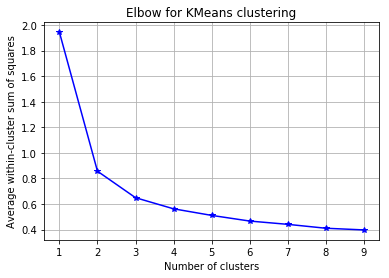

In [32]:
# 엘보 곡선 (클러스터 내 제곱의 합계 평균)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

Text(0.5, 1.0, 'Elbow for KMeans clustering')

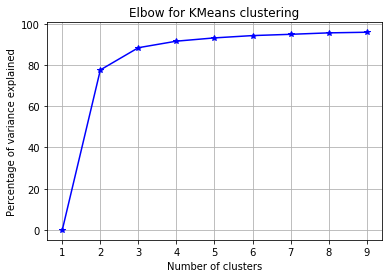

In [31]:
# 엘보곡선 (해석된 분산 퍼센티지, > 80%)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters') # 3이 이상적
plt.ylabel('Percentage of variance explained') 
plt.title('Elbow for KMeans clustering') 